In [1]:
import numpy as np
import keras
!export KERAS_BACKEND=tensorflow
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
import random

Using TensorFlow backend.


In [2]:
#################################################
#        Part 1 - Preprocessing of data         #
#################################################
###############
# Import data #
###############
# repeatable results, same numbers whenever called
np.random.seed(0)
# 60000 images train, 10000 images test
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [3]:
##########################
# Validate imported data #
##########################
# * For accurate importing
# * Verify how complex are our data
# * Be careful how is its syntax
assert(X_train.shape[0] == y_train.shape[0]), "The # images != # respective labels"
assert(X_test.shape[0] == y_test.shape[0]), "The # images != # respective labels"
assert(X_train.shape[1:] == (28,28)), "The # images dont have size 28 x 28"
assert(X_test.shape[1:] == (28,28)), "The # images dont have size 28 x 28"


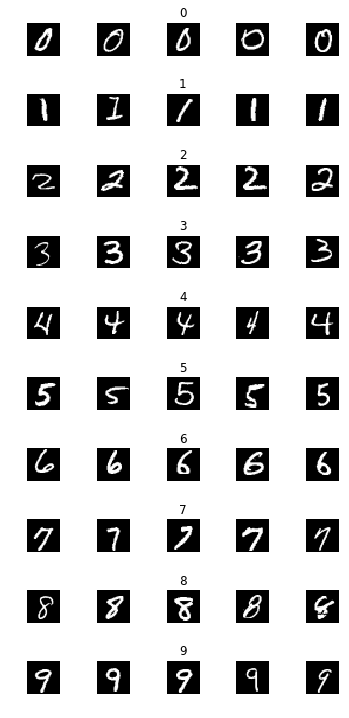

In [4]:
###################################
# Plot some images of train data  #
###################################
num_of_samples = []
cols = 5
num_of_classes = 10

fig, axs = plt.subplots(nrows = num_of_classes, ncols = cols, figsize = (5,10))
# * minimizes overlapping
fig.tight_layout()
for i in range(cols):
    for j in range(num_of_classes):
        x_selected = X_train[y_train == j]
        # :,: to get the full size of the random image
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected) - 1),:,:], cmap = plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if(i == 2): 
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))
        
        

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'No. of images')

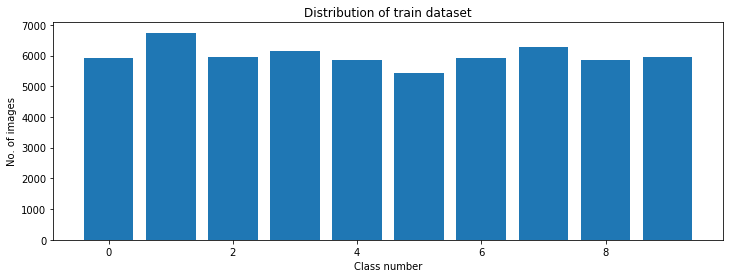

In [5]:
###################################
# Plot distribution of train data #
###################################
print(num_of_samples)
plt.figure(figsize = (12,4))
plt.bar(range(0,num_of_classes), num_of_samples)
plt.title("Distribution of train dataset")
plt.xlabel("Class number")
plt.ylabel("No. of images")

In [6]:
####################
# One hot encoding #
####################
y_train = to_categorical(y_train,num_of_classes)
y_test = to_categorical(y_test,num_of_classes)

##################
# Normalize data #
##################
# * Normalize between [0,1], decrease variance, model learns more quickly. 
# Example: e^{1} = 2.7, when e^{255} = 5.5E110
X_train = X_train / 255
X_test = X_test / 255

###########################
# Convert 2D images to 1D #
###########################
print(X_train.shape)
num_of_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0],num_of_pixels)
X_test = X_test.reshape(X_test.shape[0],num_of_pixels)



(60000, 28, 28)


In [7]:
#################################################
#        Part 2 - Model of Neural Netwwork      #
#################################################
####################
#   Define Model   #
####################
def create_model():
    model = Sequential()
    #input_dim = num_of_pixels or input_shape = (num_of_pixels,)
    model.add(Dense(10, input_dim = num_of_pixels, activation='relu')) 
    model.add(Dense(10, activation='relu')) 
    model.add(Dense(10, activation='relu')) 
    model.add(Dense(10, activation='relu')) 
    model.add(Dense(num_of_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), 'categorical_crossentropy', metrics=['accuracy'])
    return model
    

In [8]:
###################
#   Train Model   #
###################
model = create_model()
print(model.summary())
history = model.fit(x = X_train, y = y_train, validation_split = 0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 'true')

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 8,290
Trainable params: 8,290
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.cast instead.
Train on 54000 

Text(0.5, 0, 'Epochs')

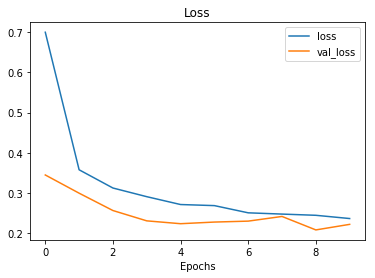

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

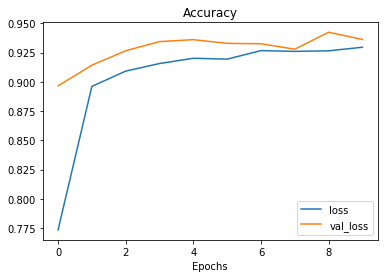

In [10]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['loss', 'val_loss'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [11]:
########################
#  Evaluate Model pt.1 #
########################
score = model.evaluate(X_test, y_test, verbose = 0)
print("Test score is : ",score[0])
print("Test accuracy is : ",score[1])

Test score is :  0.2602593639329076
Test accuracy is :  0.9248


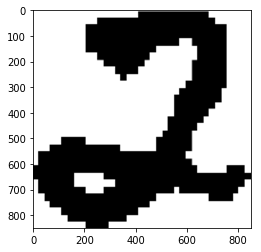

In [12]:
###########################
#   Evaluate Model pt.2   #
###########################
######################
#   Import new image #
######################
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
                
plt.imshow(img)

(850, 850, 4)
(28, 28, 4)
(28, 28)


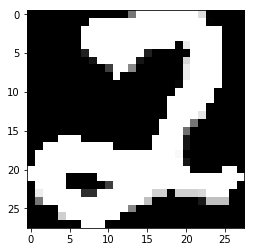

In [13]:
######################
#   Gray scale image #
######################
import cv2
img_array = np.asarray(img)
resized_img = cv2.resize(img_array, (28,28))
gray_img = cv2.cvtColor(resized_img, cv2.COLOR_RGB2GRAY)
image = cv2.bitwise_not(gray_img)

print(img_array.shape)
print(resized_img.shape)
print(gray_img.shape)
plt.imshow(image, cmap = plt.get_cmap("gray"))

In [14]:
###############################
#   Prediction for the  image #
###############################
image = image/255
image = image.reshape(1, 784)

predicted_digit = model.predict_classes(image)


print("Prediction for image '2' is :", str(predicted_digit))

Prediction for image '2' is : [7]
Prediction for image '2' is : [2]
